# Data Overview - Blog Authorship Corpus

This Jupyter Notebook provides an overview of the Blog Authorship Corpus dataset. 
The dataset contains text data from over 600,000 blog posts written by over 19,000 bloggers.

## Steps for data processing

- The dataset = loaded from a CSV file
- Whitespace was removed from text
- Basic statistics were calculated, including the number of blog posts, the number of bloggers, and the average length of a blog post
- The distribution of bloggers by age was visualized using a bar chart

This notebook provides a starting point for further analysis of the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('data/blogtext 2.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [3]:
# Remove whitespace
data['text'] = data['text'].str.strip()

Basic stats

In [4]:
# Basic statistics
n_posts = len(data)
n_bloggers = len(data['id'].unique())

print('Blog Authorship Corpus Overview')
print(f'Number of blog posts: {n_posts}')
print(f'Number of bloggers: {n_bloggers}')

Blog Authorship Corpus Overview
Number of blog posts: 681284
Number of bloggers: 19320


Age distriution - who writes the most? who is the most represented?

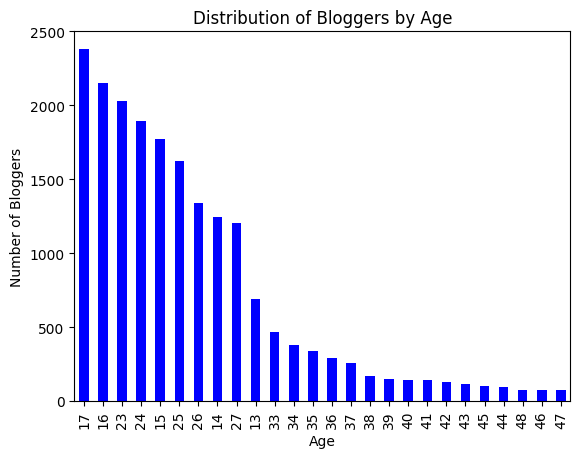

In [5]:
# Distribution of bloggers by age
age_distribution = data.groupby(['age'])['id'].nunique().sort_values(ascending=False)

age_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Bloggers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Bloggers')
plt.show()

Get into format for our use case

In [6]:
data = data.drop(['id', 'gender', 'topic', 'sign', 'date'], axis = 1)
data.head()

,age,text
0,15,"Info has been found (+/- 100 pages, and 4.5 MB..."
1,15,These are the team members: Drewes van der L...
2,15,In het kader van kernfusie op aarde: MAAK JE ...
3,15,testing!!! testing!!!
4,33,Thanks to Yahoo!'s Toolbar I can now 'capture'...


Set markings to infer 3 categorical values denoting age group

In [7]:
data['age_category'] = pd.cut(data['age'], bins=[10, 19, 29, 39], labels=['10s', '20s', '30s'])
data.head()

,age,text,age_category
0,15,"Info has been found (+/- 100 pages, and 4.5 MB...",10s
1,15,These are the team members: Drewes van der L...,10s
2,15,In het kader van kernfusie op aarde: MAAK JE ...,10s
3,15,testing!!! testing!!!,10s
4,33,Thanks to Yahoo!'s Toolbar I can now 'capture'...,30s


In [8]:
data = data.drop(['age'], axis=1)
data.head()

,text,age_category
0,"Info has been found (+/- 100 pages, and 4.5 MB...",10s
1,These are the team members: Drewes van der L...,10s
2,In het kader van kernfusie op aarde: MAAK JE ...,10s
3,testing!!! testing!!!,10s
4,Thanks to Yahoo!'s Toolbar I can now 'capture'...,30s


This data is now in the final form that we need it in -> a (text, age group) pair